import các thư viện, dữ liệu và làm sạch dữ liệu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_excel('Downloads\Final_project_RFM\ecommerce retail.xlsx')
print(df1.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df1.shape

(541909, 8)

In [5]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df1.dropna(subset=['CustomerID'], inplace=True)

In [7]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df1[df1['CustomerID'].notna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
df1=df1.loc[df1['Quantity']>=0]

loại bỏ những cột không cần thiết: StockCode, Description,Country

In [10]:
df=df1.drop(["StockCode","Description","Country"],axis="columns")


In [11]:
df.dtypes
df.shape

(397924, 5)

In [12]:
df.sort_values('InvoiceDate')

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541896,581587,12,2011-12-09 12:50:00,1.65,12680.0
541895,581587,12,2011-12-09 12:50:00,1.65,12680.0
541894,581587,12,2011-12-09 12:50:00,1.95,12680.0
541900,581587,4,2011-12-09 12:50:00,3.75,12680.0


In [13]:
#kiểm tra kiểu dữ liệu của InvoiceDate
df['InvoiceDate'].dtype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [14]:
# tạo biến Ngày hiện tại: là ngày cuối cùng trong df + 1.
current_date =df["InvoiceDate"].max()+pd.Timedelta(days=1)
print(df.head())


  InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID
0    536365         6 2010-12-01 08:26:00       2.55     17850.0
1    536365         6 2010-12-01 08:26:00       3.39     17850.0
2    536365         8 2010-12-01 08:26:00       2.75     17850.0
3    536365         6 2010-12-01 08:26:00       3.39     17850.0
4    536365         6 2010-12-01 08:26:00       3.39     17850.0


In [15]:
#Doanh thu = số lượng * đơn giá
df['Monetary_Value']=df['UnitPrice']*df['Quantity']

In [16]:
#groupby customerID để tạo 1 df mới: CustomerID, Frequency, Recency, Monetary
df_customer = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days,
                                            'InvoiceNo':lambda a:len(set(a)),'Monetary_Value':'sum'})
df_customer.head()

,InvoiceDate,InvoiceNo,Monetary_Value
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [17]:
#đổi tên các cột để thuận tiện cho việc phân nhóm khách hàng
new_df =df_customer.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency'}).reset_index()
print(new_df.head())


   CustomerID  Recency  Frequency  Monetary_Value
0     12346.0      326          1        77183.60
1     12347.0        2          7         4310.00
2     12348.0       75          4         1797.24
3     12349.0       19          1         1757.55
4     12350.0      310          1          334.40


In [18]:
#sử dụng hàm qcut() của pandas để tính diểm cho các cột.
# syntax: pd.qcut(x,q,labels=None, retbins=False, Precision=3, duplicates ='raise')

In [19]:
# Tính điểm R
r_labels = range(5, 0, -1)
new_df['R_score'] = pd.qcut(new_df['Recency'], q=5, labels=r_labels)

# Tính điểm F và M
f_labels = range(1, 6)
m_labels = range(1, 6)
new_df['F_score'] = pd.qcut(new_df['Frequency'].rank(method='first'), q=5, labels=False)+1
new_df['M_score'] = pd.qcut(new_df['Monetary_Value'], q=5, labels=m_labels)

# Tạo cột mới 'FRM Score' từ các giá trị của 'F_score', 'R_score', 'M_score'
new_df['RFM Score'] = new_df['F_score'].astype(str) + new_df['R_score'].astype(str) + new_df['M_score'].astype(str)
new_df


,CustomerID,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,424
3,12349.0,19,1,1757.55,4,1,4,144
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,211
4335,18281.0,181,1,80.82,1,2,1,211
4336,18282.0,8,2,178.05,5,3,1,351
4337,18283.0,4,16,2094.88,5,5,5,555


In [20]:
print(new_df.columns); new_df.shape

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary_Value', 'R_score',
       'F_score', 'M_score', 'RFM Score'],
      dtype='object')


(4339, 8)

C:\Users\Admin\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

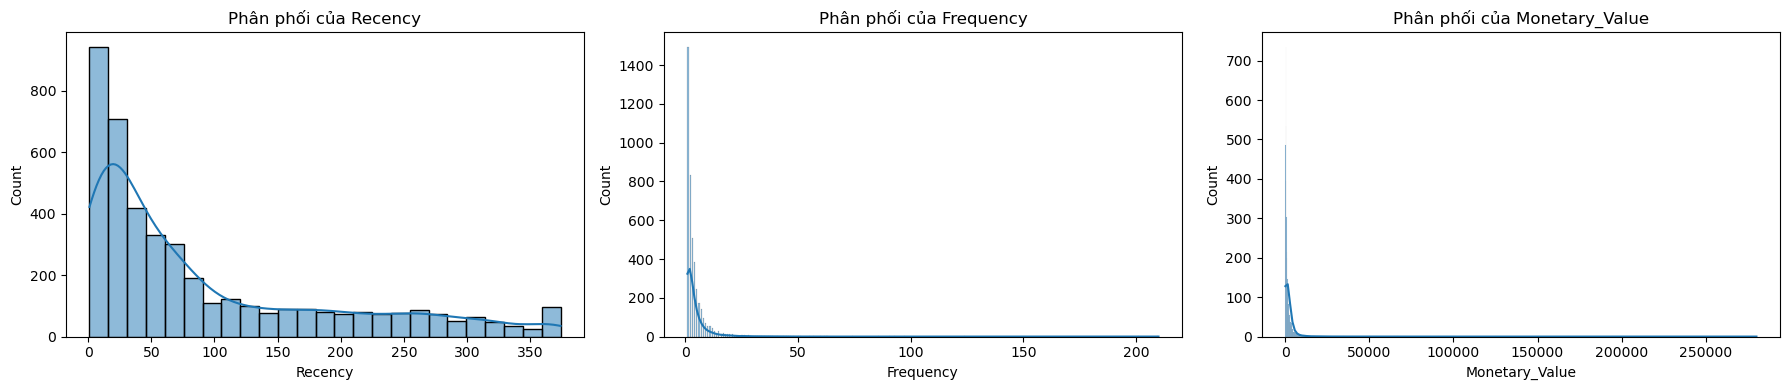

In [21]:
#biều đổ plot() thể hiện sự phân phối của các khách hàng qua: Rencency, Frequency, Monetary_Values
plt.figure(figsize=(18,4))

# Vẽ biểu đồ phân phối cho Recency
plt.subplot(1, 3, 1) 
sns.histplot(data=new_df, x='Recency', kde=True)
plt.title('Phân phối của Recency')

# Vẽ biểu đồ phân phối cho Frequency
plt.subplot(1, 3, 2) 
sns.histplot(data=new_df, x='Frequency', kde=True)
plt.title('Phân phối của Frequency')

# Vẽ biểu đồ phân phối cho Monetary_Value
plt.subplot(1, 3, 3) 
sns.histplot(data=new_df, x='Monetary_Value', kde=True)
plt.title('Phân phối của Monetary_Value')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [22]:
seg = pd.read_excel('Downloads\Final_project_RFM\ecommerce retail.xlsx', sheet_name='Segmentation')
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [23]:
#chuyển đổi kiểu dữ liệu tại cột RFM Score
seg['RFM Score']=seg['RFM Score'].str.split(',')
seg=seg.explode('RFM Score').reset_index(drop=True)
seg.sort_values(by='RFM Score')
seg

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [24]:
seg['RFM Score'].dtype
seg['RFM Score']=seg['RFM Score'].astype(int)
seg['RFM Score'].dtype

dtype('int32')

In [25]:
seg


,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [26]:
new_df['RFM Score'].dtype
new_df['RFM Score']=new_df['RFM Score'].astype(int)
new_df['RFM Score'].dtype

dtype('int32')

In [27]:
new_df

,CustomerID,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,424
3,12349.0,19,1,1757.55,4,1,4,144
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,211
4335,18281.0,181,1,80.82,1,2,1,211
4336,18282.0,8,2,178.05,5,3,1,351
4337,18283.0,4,16,2094.88,5,5,5,555


In [28]:
# hợp nhất hai DataFrame 
df = pd.merge(seg, new_df, on='RFM Score', how='outer')


In [29]:
df

,Segment,RFM Score,CustomerID,Recency,Frequency,Monetary_Value,R_score,F_score,M_score
0,Champions,555,12347.0,2.0,7.0,4310.00,5,5.0,5
1,Champions,555,12362.0,3.0,10.0,5226.23,5,5.0,5
2,Champions,555,12417.0,3.0,9.0,3649.10,5,5.0,5
3,Champions,555,12433.0,1.0,7.0,13375.87,5,5.0,5
4,Champions,555,12437.0,2.0,18.0,4951.41,5,5.0,5
...,...,...,...,...,...,...,...,...,...
4341,Lost customers,151,14569.0,1.0,1.0,227.39,5,1.0,1
4342,Lost customers,151,14578.0,3.0,1.0,168.63,5,1.0,1
4343,Lost customers,151,14601.0,11.0,1.0,213.96,5,1.0,1
4344,Lost customers,151,15097.0,4.0,1.0,248.08,5,1.0,1


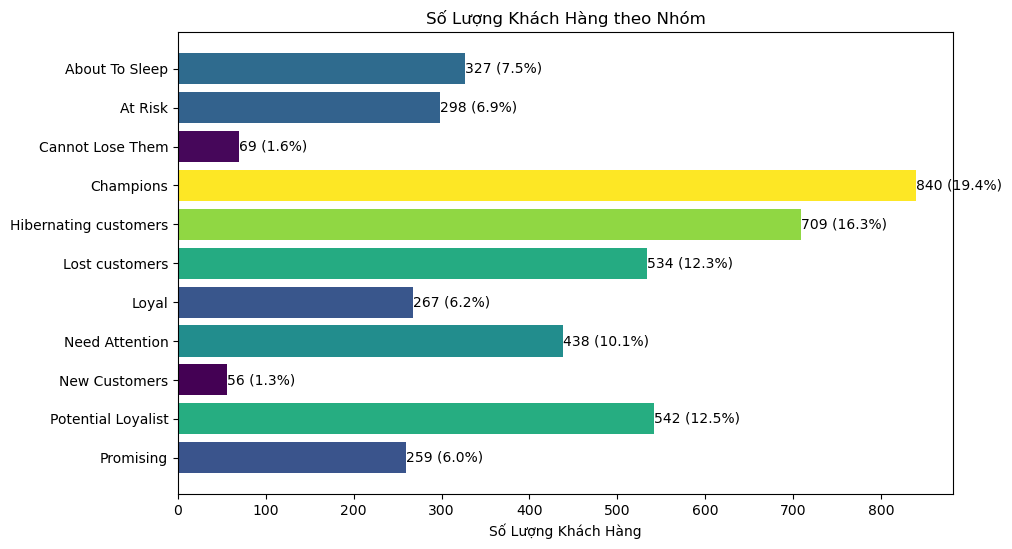

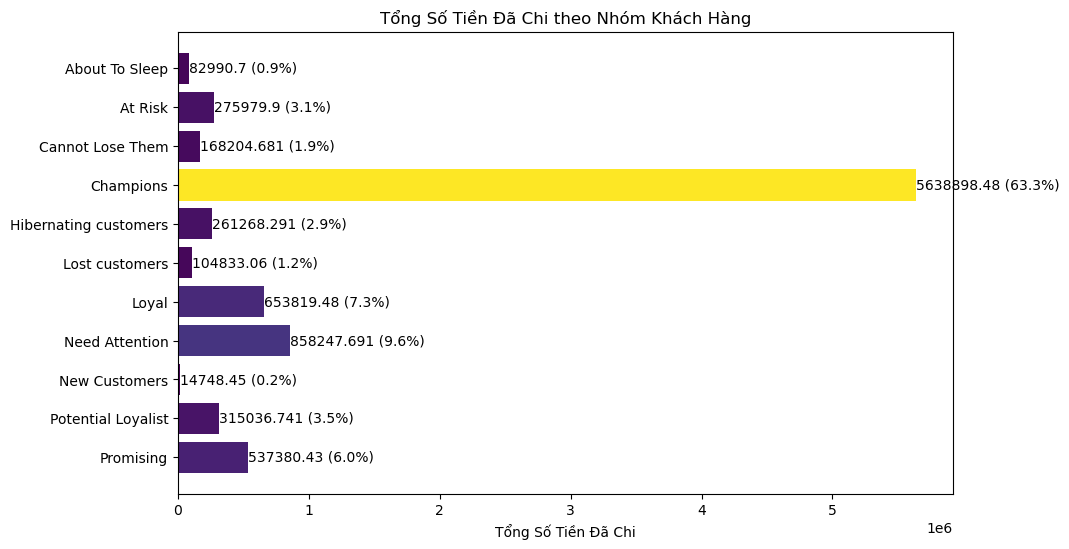

In [30]:
# Tính số lượng khách hàng và tổng số tiền cho mỗi nhóm
grouped = df.groupby('Segment').agg({'CustomerID': 'count', 'Monetary_Value': 'sum'})

# Tính tổng số khách hàng và tổng số tiền
total_customers = grouped['CustomerID'].sum()
total_money = grouped['Monetary_Value'].sum()

# Tạo bản đồ màu
cmap = plt.get_cmap('viridis')

# Chuẩn hóa giá trị CustomerID về phạm vi từ 0 đến 1
norm = plt.Normalize(grouped['CustomerID'].min(), grouped['CustomerID'].max())

# Áp dụng bản đồ màu để lấy màu sắc tương ứng với mỗi giá trị trong CustomerID
colors = cmap(norm(grouped['CustomerID']))

# Vẽ biểu đồ cột cho số lượng khách hàng
plt.figure(figsize=(10, 6))
bars = plt.barh(grouped.index, grouped['CustomerID'], color=colors)
plt.xlabel('Số Lượng Khách Hàng')
plt.title('Số Lượng Khách Hàng theo Nhóm')
for bar, count in zip(bars, grouped['CustomerID']):
    percentage = '{:.1f}%'.format((count / total_customers) * 100)
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count) + ' (' + percentage + ')',
             va='center', ha='left')
plt.gca().invert_yaxis()
plt.show()

# Chuẩn hóa giá trị Monetary_Value về phạm vi từ 0 đến 1
norm = plt.Normalize(grouped['Monetary_Value'].min(), grouped['Monetary_Value'].max())

# Áp dụng bản đồ màu để lấy màu sắc tương ứng với mỗi giá trị trong Monetary_Value
colors = cmap(norm(grouped['Monetary_Value']))

# Vẽ biểu đồ cột cho tổng số tiền
plt.figure(figsize=(10, 6))
bars = plt.barh(grouped.index, grouped['Monetary_Value'], color=colors)
plt.xlabel('Tổng Số Tiền Đã Chi')
plt.title('Tổng Số Tiền Đã Chi theo Nhóm Khách Hàng')
for bar, count in zip(bars, grouped['Monetary_Value']):
    percentage = '{:.1f}%'.format((count / total_money) * 100)
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count) + ' (' + percentage + ')',
             va='center', ha='left')
plt.gca().invert_yaxis()
plt.show()

- Dựa vào biểu đồ ta có thể thấy, tập khách hàng Chính thuộc nhóm champion. họ chiếm 19,4% trên tổng số lượng khách hàng và doanh thu chiếm hơn 63,3%.  >> Đây là 1 nhóm khách hàng đông và rất tiềm năng, nên tập trung chăm sóc, đảm bảo nhóm khách hàng này tiếp tục mua hàng. 
- Các nhóm khách hàng khách doanh thu tung bình chưa đến 10% trong đó new customer và about to sleep doanh thu chiếm chưa đến 1%
- Các nhóm khách hàng như: Potential, need atention,bibernating, lost customer có số lượng khách hàng 400 -550 người.